In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame=True)
df = data.frame

print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# Calculate RMSE by taking the square root of the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Linear Regression RMSE:", rmse)

Linear Regression RMSE: 0.7455813830127763


In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Decision Tree RMSE: 0.7037294974840077


In [5]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Random Forest RMSE: 0.5053399773665033


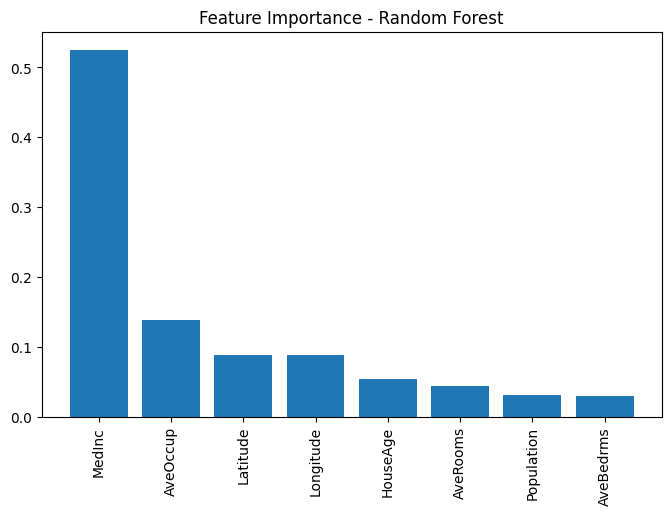

In [6]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Feature Importance - Random Forest")
plt.show()


In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

import warnings
warnings.filterwarnings("ignore")

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=1,
    verbose=3   # 👈 This prints progress
)

grid.fit(X_train, y_train)



print("Best Params:", grid.best_params_)
print("Best Score:", -grid.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END max_depth=None, min_samples_split=2, n_estimators=50;, score=-0.522 total time=   4.6s
[CV 2/3] END max_depth=None, min_samples_split=2, n_estimators=50;, score=-0.516 total time=   5.1s
[CV 3/3] END max_depth=None, min_samples_split=2, n_estimators=50;, score=-0.522 total time=   4.6s
[CV 1/3] END max_depth=None, min_samples_split=2, n_estimators=100;, score=-0.519 total time=   9.8s
[CV 2/3] END max_depth=None, min_samples_split=2, n_estimators=100;, score=-0.512 total time=   9.8s
[CV 3/3] END max_depth=None, min_samples_split=2, n_estimators=100;, score=-0.519 total time=   9.4s
[CV 1/3] END max_depth=None, min_samples_split=2, n_estimators=200;, score=-0.516 total time=  19.6s
[CV 2/3] END max_depth=None, min_samples_split=2, n_estimators=200;, score=-0.511 total time=  19.4s
[CV 3/3] END max_depth=None, min_samples_split=2, n_estimators=200;, score=-0.518 total time=  19.3s
[CV 1/3] END max_depth=None, min_

In [11]:
print(grid.best_params_)
best_rf = grid.best_estimator_


{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

results = []

# Replace rf with the tuned model
models = {
    "Linear Regression": lin_reg,
    "Decision Tree": tree,
    "Random Forest (Tuned)": best_rf
}

for name, model in models.items():
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, mse, rmse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R² Score"])
print(results_df)


                   Model       MAE       MSE      RMSE  R² Score
0      Linear Regression  0.533200  0.555892  0.745581  0.575788
1          Decision Tree  0.454679  0.495235  0.703729  0.622076
2  Random Forest (Tuned)  0.326812  0.253976  0.503960  0.806186


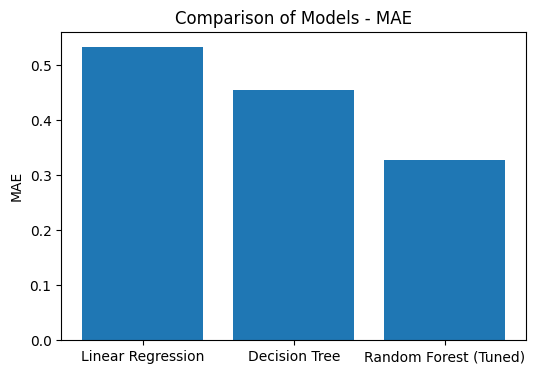

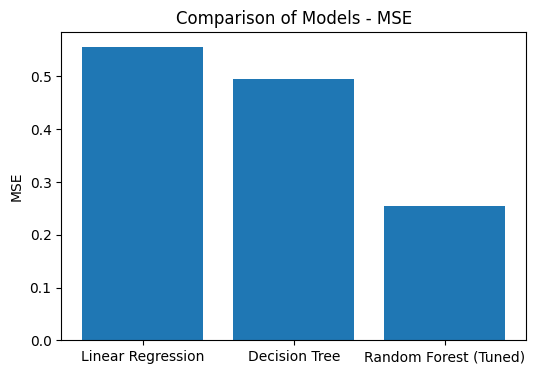

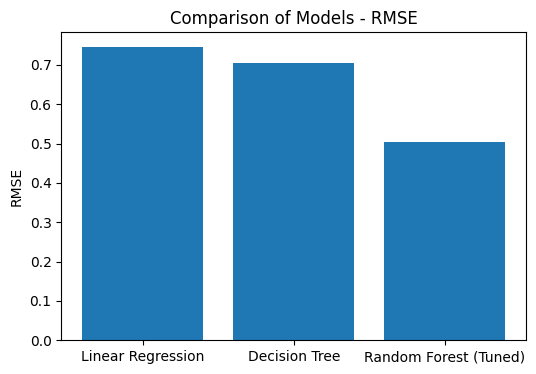

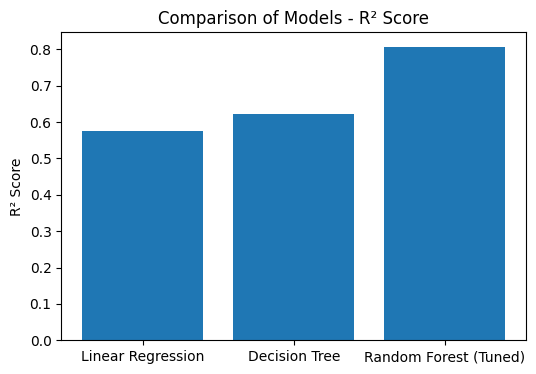

In [14]:
import matplotlib.pyplot as plt

metrics = ["MAE","MSE" ,"RMSE", "R² Score"]

for metric in metrics:
    plt.figure(figsize=(6,4))
    plt.bar(results_df["Model"], results_df[metric])
    plt.title(f"Comparison of Models - {metric}")
    plt.ylabel(metric)
    plt.show()


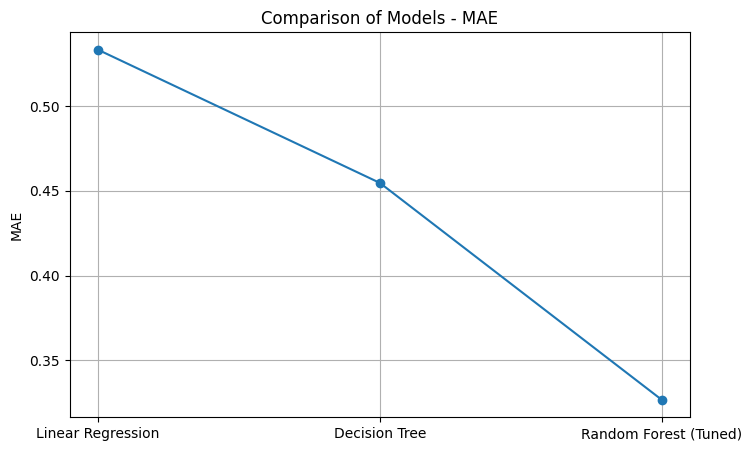

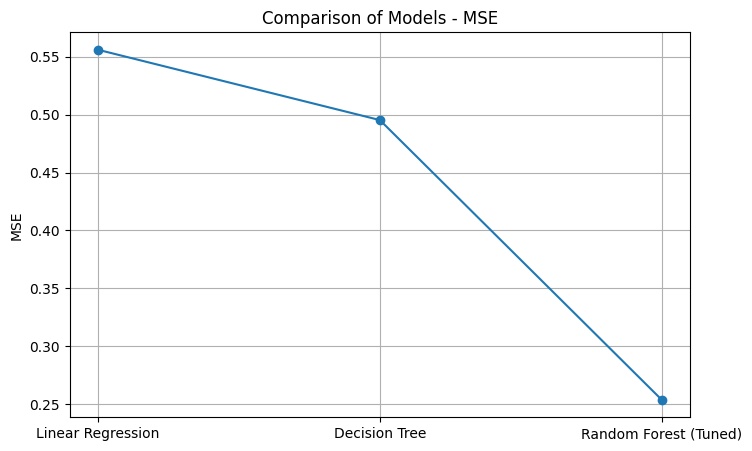

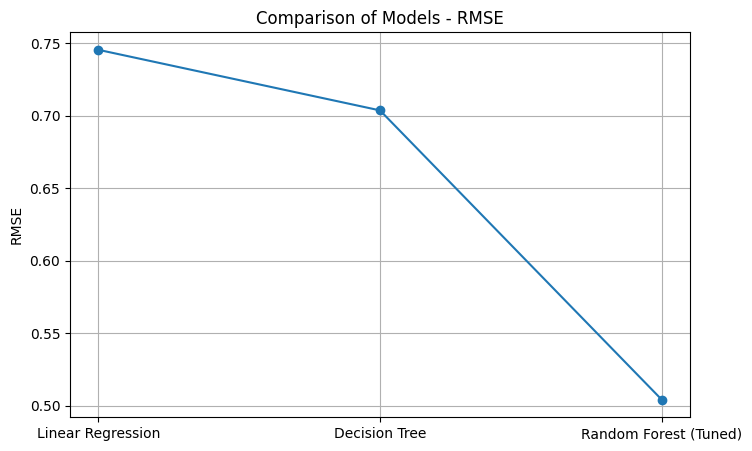

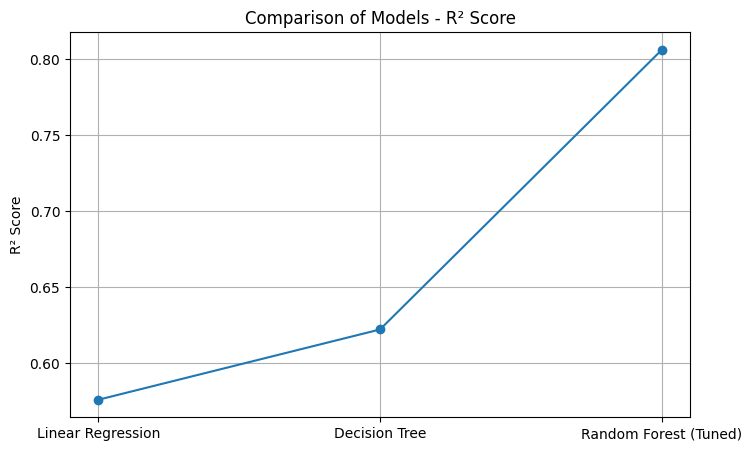

In [16]:
import matplotlib.pyplot as plt

metrics = ["MAE", "MSE", "RMSE", "R² Score"]

for metric in metrics:
    plt.figure(figsize=(8, 5))
    plt.plot(results_df["Model"], results_df[metric], marker='o')
    plt.title(f"Comparison of Models - {metric}")
    plt.ylabel(metric)
    plt.grid(True)
    plt.show()